In [1]:
from Generator import Generator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import os

In [2]:
generator = Generator()

q = generator.generate_all(1, clean=False)[0]

Generating images: 19/19 [--------------------]


In [ ]:
# denoising
fig, axarr = plt.subplots(n_images, 2, figsize = (10, 10), sharey=True, sharex=True)

for i in range(n_images):
    u8 = (255 * q[i] / q[i].max()).astype(np.uint8)
    dst = cv2.fastNlMeansDenoising(u8,None,15,7,21)
    c = sns.heatmap(q[i], cmap='viridis', ax=axarr[i, 0], cbar=False)
    c.axis("off")
    d = sns.heatmap(dst, cmap='viridis', ax=axarr[i, 1], cbar=False)
    d.axis("off")

In [4]:
from ctypes import *
# env /usr/bin/arch -x86_64 /bin/zsh --login
# gcc -shared -o otsu.so -fPIC otsu.c

class Spectrogram(Structure):
    _fields_ = [("a", c_int),
                ("array", (c_float * 170) * 140)]

otsu = CDLL("otsu.so")
otsu.clean_image.argtypes = [POINTER(Spectrogram)]

cleaned_data = np.empty(shape=(q.shape[0], 140, 170))



for num in range(q.shape[0]):
    t = Spectrogram()
    d = q[num].astype(np.float32)
    memmove(byref(t.array), d.ctypes.data, d.nbytes)
        
    otsu.clean_image(byref(t))
    cleaned_data[num] = np.array(t.array)

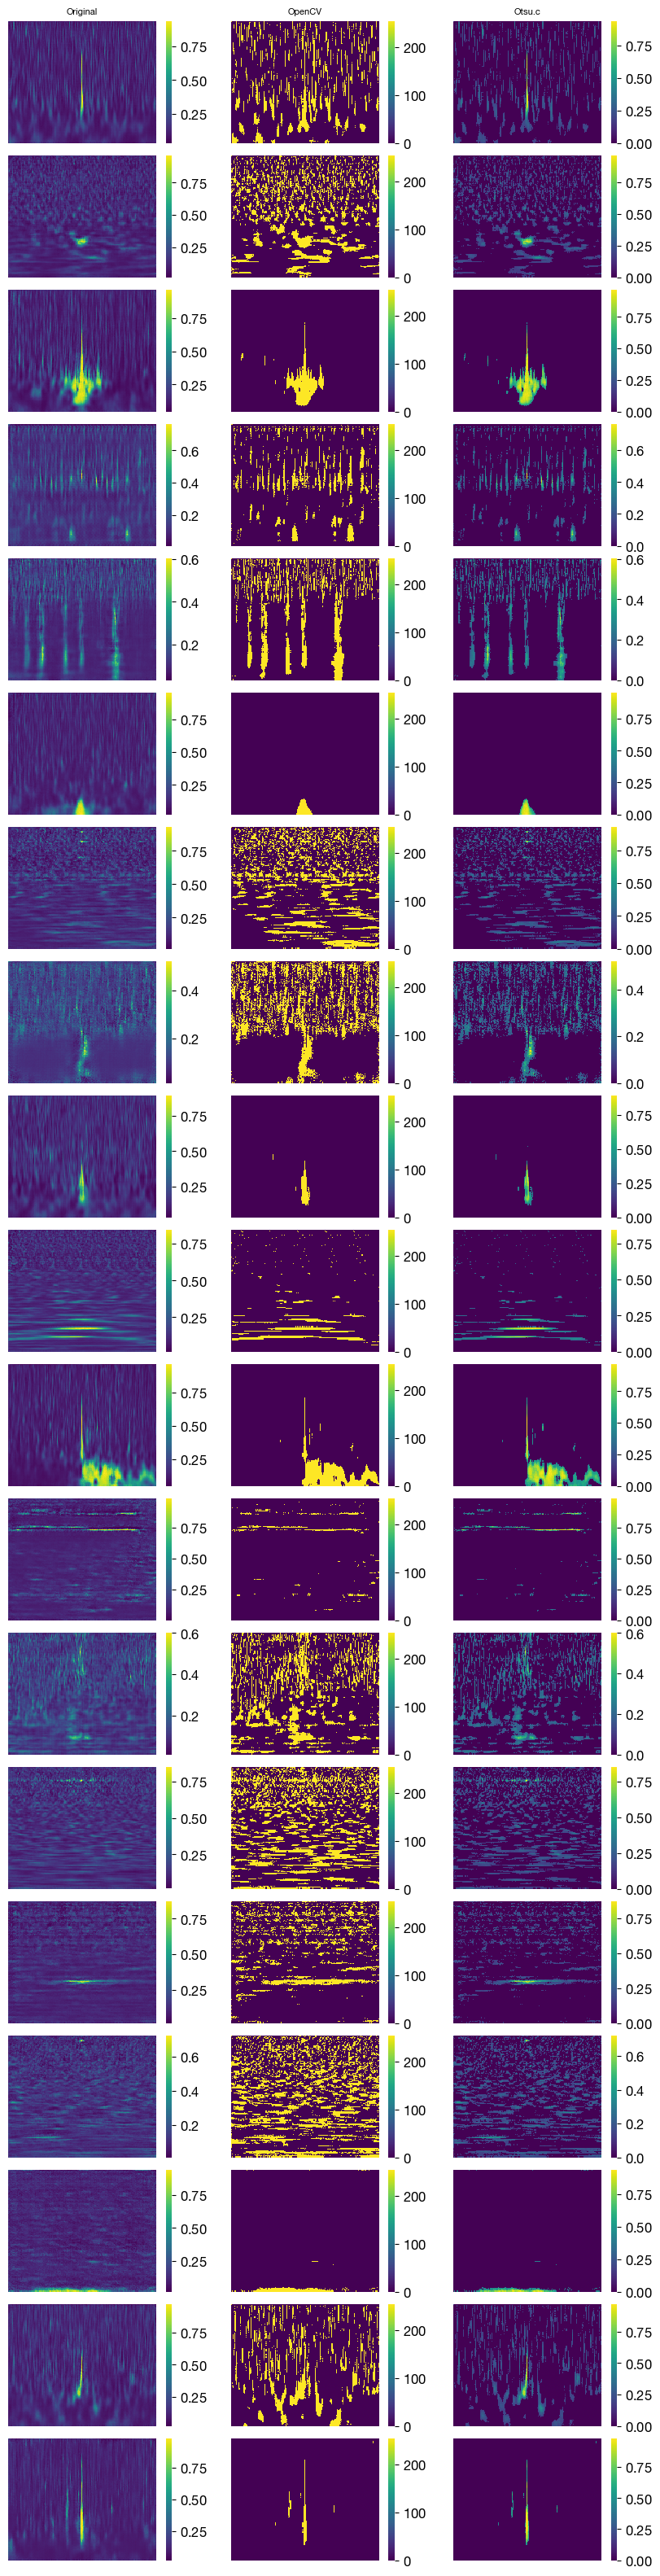

In [8]:
# Otsu's thresholding - looks good!

fig, axarr = plt.subplots(q.shape[0], 3, figsize = (10, 40), sharey=True, sharex=True)
titles = ["Original", "OpenCV", "Otsu.c"]


for i in range(q.shape[0]):
    orig = q[i]
    cleaned = cleaned_data[i]

    img = (255 * orig / orig.max()).astype(np.uint8)
    
    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
    
    b = sns.heatmap(orig, cmap='viridis', ax=axarr[i, 0])
    b.axis("off")

    c = sns.heatmap(th2, cmap='viridis', ax=axarr[i, 1])
    c.axis("off")

    e = sns.heatmap(cleaned, cmap='viridis', ax=axarr[i, 2])
    e.axis("off")

    
for i in range(len(titles)):
    axarr[0, i].axis("off")
    axarr[0, i].set_title(titles[i], fontweight='bold', fontsize=8)

fig.subplots_adjust(hspace=0.1, bottom=0.1)